In [1]:
from pymongo import MongoClient
client = MongoClient ('localhost', 27017)
db= client.twitterdb

In [2]:
import tweepy
import json

In [3]:
MONGO_HOST= 'mongodb://localhost/twitterdb'

In [4]:
WORDS = ['#Trump', '#Russia', '#election', '#democracy', '#fake news']

In [5]:
CONSUMER_KEY = "LJFl7bTli4iGA1841aaVlWR9L"
CONSUMER_SECRET = "0VkXnvVp5kcwnhMJoHgtp6OAKP8NqrC60aiAOg1AWRoTT8nHdb"
ACCESS_TOKEN = "848231490433503232-2WedE9JMjMiFoMsQwUVBrgApygowMs7"
ACCESS_TOKEN_SECRET = "raGKV9deMXy5OiFDeohuqtYIC7mgPiAxJT8e01pwSKqgI"

In [10]:
class StreamListener(tweepy.StreamListener):    
     
 
    def on_connect(self):
        
        print("You are now connected to the streaming API.")
 
    def on_error(self, status_code):
        
        print('An Error has occured: ' + repr(status_code))
        return False
 
    def on_data(self, data):
        
        try:
            client = MongoClient(MONGO_HOST)
            
            
            db = client.twitterdb
    
            
            datajson = json.loads(data)
            
            
            created_at = datajson['created_at']
 
            
            print("Tweet collected at " + str(created_at))
            
    
            db.twitter_search.insert(datajson)
        except Exception as e:
           print(e)

In [11]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
listener = StreamListener(api=tweepy.API(wait_on_rate_limit=True)) 
streamer = tweepy.Stream(auth=auth, listener=listener)
print("Tracking: " + str(WORDS))
streamer.filter(track=WORDS)

Tracking: ['#Trump', '#Russia', '#election', '#democracy', '#fake news']
You are now connected to the streaming API.
Tweet collected at Sun Apr 02 15:55:56 +0000 2017
Tweet collected at Sun Apr 02 15:55:56 +0000 2017
Tweet collected at Sun Apr 02 15:55:56 +0000 2017


/Users/Marie/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:32: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.


Tweet collected at Sun Apr 02 15:55:57 +0000 2017
Tweet collected at Sun Apr 02 15:55:57 +0000 2017
Tweet collected at Sun Apr 02 15:55:57 +0000 2017
Tweet collected at Sun Apr 02 15:55:58 +0000 2017
Tweet collected at Sun Apr 02 15:55:58 +0000 2017
Tweet collected at Sun Apr 02 15:55:59 +0000 2017
Tweet collected at Sun Apr 02 15:55:59 +0000 2017
Tweet collected at Sun Apr 02 15:55:59 +0000 2017
Tweet collected at Sun Apr 02 15:56:00 +0000 2017
Tweet collected at Sun Apr 02 15:56:00 +0000 2017
Tweet collected at Sun Apr 02 15:56:00 +0000 2017
Tweet collected at Sun Apr 02 15:56:00 +0000 2017
Tweet collected at Sun Apr 02 15:56:01 +0000 2017
Tweet collected at Sun Apr 02 15:56:01 +0000 2017
Tweet collected at Sun Apr 02 15:56:01 +0000 2017
Tweet collected at Sun Apr 02 15:56:02 +0000 2017
Tweet collected at Sun Apr 02 15:56:02 +0000 2017
Tweet collected at Sun Apr 02 15:56:04 +0000 2017
Tweet collected at Sun Apr 02 15:56:04 +0000 2017
Tweet collected at Sun Apr 02 15:56:04 +0000 2017


ReadTimeoutError: HTTPSConnectionPool(host='stream.twitter.com', port=443): Read timed out.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
tweets_iterator = db.twitter_search.find()
for tweet in tweets_iterator:
  print (tweet['text'])

RT @24k_Uk: U guys ready?#Russia https://t.co/Pi1l7P2SwH
RT @KillerKellyReno: Our Dishonest President is @potus44. #Yuge #Hypocrite! #tcot #tlot #p2 #Trump is EXPOSING the #Truth about… 
Wow, this LA Times article makes it out that Trump is going to destroy America. Part 1 today and Part 2 of the arti… https://t.co/eUUsP5Tsry
Op verzoek v #Trump beperkt Israël de bouw in de nederzettingen en neemt economische maatregelen tbv de Palestijnen https://t.co/dsIPJmMTYT
This makes me sad and sick to my core. I am 110% disgusted in the acts of Russia and even more when they attack mem… https://t.co/UhQkrjAXXy
RT @Politweecs: #Trump calls for cuts on medical research and infrastructure to pay for the wall. I thought Mexico was supposed to… 
RT @DrMartyFox: ATTN: #Trump Hating Pussy Hat Wearing #Feminists 

Advancing Sharia 

Swedish Feminists Flee Islamic No Go Zones… 
RT @amjoyshow: .@AmandiOnAir takes look at numbers surrounding #Trump's family travel and security vs. Obama's at this point #A

In [28]:
db.twitter_search.count()

797

In [29]:
doc=db.twitter_search.find_one()

In [30]:
doc

{'_id': ObjectId('58e11f0ceb4a221f8315f6dc'),
 'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Apr 02 15:55:56 +0000 2017',
 'entities': {'hashtags': [{'indices': [25, 32], 'text': 'Russia'}],
  'media': [{'display_url': 'pic.twitter.com/Pi1l7P2SwH',
    'expanded_url': 'https://twitter.com/24k_Uk/status/848560396516700164/photo/1',
    'id': 848560380305690625,
    'id_str': '848560380305690625',
    'indices': [33, 56],
    'media_url': 'http://pbs.twimg.com/media/C8axK4aXUAEf34V.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/C8axK4aXUAEf34V.jpg',
    'sizes': {'large': {'h': 1800, 'resize': 'fit', 'w': 1440},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 960},
     'small': {'h': 680, 'resize': 'fit', 'w': 544},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 848560396516700164,
    'source_status_id_str': '848560396516700164',
    'source_user_id': 1699672808,
    'source_user_id_str': '1699672808',
    'type': 'photo',
 

In [32]:
document_id = doc["_id"]
print (type(document_id))
document_id

<class 'bson.objectid.ObjectId'>


ObjectId('58e11f0ceb4a221f8315f6dc')

In [34]:
print (document_id.generation_time.strftime("%Y-%m-%d %H:%M:%SZ%z"))

2017-04-02 15:55:56Z+0000


In [35]:
doc["created_at"]

'Sun Apr 02 15:55:56 +0000 2017'

In [36]:
doc["text"]

'RT @24k_Uk: U guys ready?#Russia https://t.co/Pi1l7P2SwH'

In [37]:
doc["user"]

{'contributors_enabled': False,
 'created_at': 'Sat Dec 13 02:32:25 +0000 2014',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'Você vai descobrir mais cedo ou mais tarde que o tempo para ser feliz é curto, e cada instante que vai embora ... não volta mais.',
 'favourites_count': 40662,
 'follow_request_sent': None,
 'followers_count': 1839,
 'following': None,
 'friends_count': 1410,
 'geo_enabled': True,
 'id': 2918909051,
 'id_str': '2918909051',
 'is_translator': False,
 'lang': 'pt',
 'listed_count': 6,
 'location': 'Jaboticabal, Brasil',
 'name': 'Armycional  ❤🔫',
 'notifications': None,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/2918909051/1487297224',
 'profile_image_url': 'http://pb

In [38]:
doc["user"]["verified"]

False

In [39]:
verified_users = db.twitter_search.find({"user.verified":True})

In [40]:
verified_users.count()

10

In [41]:
import pandas

users = pandas.DataFrame([msg["user"] for msg in verified_users])
users

,contributors_enabled,created_at,default_profile,default_profile_image,description,favourites_count,follow_request_sent,followers_count,following,friends_count,...,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,url,utc_offset,verified
0,False,Thu Feb 19 19:22:48 +0000 2009,False,False,Sr Assoc. Athletic Director at Temple Universi...,9663,None,3503,None,2631,...,DDFFCC,333333,True,False,Ldoc32,12439,Eastern Time (US & Canada),http://about.me/ldoc32,-14400,True
1,False,Fri Sep 05 19:59:57 +0000 2008,False,False,Global #SME #Cybersecurity #VC \nAdviser @son...,11660,None,12721,None,5721,...,E0FF92,000000,True,False,IdeaGov,123071,Pacific Time (US & Canada),http://www.digijaks.com,-25200,True
2,False,Thu Feb 09 01:10:18 +0000 2012,True,False,"China Insight, Global View. Xinhua News Agency...",0,None,8368770,None,78,...,DDEEF6,333333,True,False,XHNews,83282,Beijing,http://www.news.cn/english/,28800,True
3,False,Tue Feb 21 19:45:52 +0000 2012,False,False,A agência Sputnik é um serviço de notícias glo...,8,None,11585,None,1269,...,FFFFFF,333333,False,False,sputnik_brasil,35762,Muscat,http://br.sputniknews.com,14400,True
4,False,Wed Sep 03 17:35:09 +0000 2008,False,False,Host/managing editor of TV One's daily morning...,5566,None,449698,None,2698,...,DDEEF6,333333,True,False,rolandsmartin,317493,Eastern Time (US & Canada),http://www.rolandsmartin.com,-14400,True
5,False,Mon May 25 09:15:59 +0000 2009,False,False,The European political party for liberal democ...,1157,None,36035,None,1181,...,F6FFD1,333333,True,False,ALDEParty,9119,Brussels,http://www.aldeparty.eu,7200,True
6,False,Wed Dec 17 13:58:27 +0000 2008,False,False,Since 2007 - Better Service. Better Insights. ...,11919,None,10793,None,491,...,E3ECE4,222222,False,False,moneymorning,25672,Eastern Time (US & Canada),http://www.moneymorning.com,-14400,True
7,False,Tue Aug 17 10:15:46 +0000 2010,False,False,"Down To Earth, a fortnightly magazine, provide...",70,None,12477,None,670,...,DAECF4,663B12,False,False,down2earthindia,13574,New Delhi,http://www.downtoearth.org.in/,19800,True
8,False,Sun Jun 17 14:07:22 +0000 2012,False,False,"Sociologist, author, speaker, pundit. Fighter ...",1418,None,14553,None,1648,...,DDEEF6,333333,False,False,DaShanneStokes,17725,Atlantic Time (Canada),http://www.dashannestokes.com,-10800,True
9,False,Thu Sep 17 10:25:56 +0000 2009,False,False,Journalism free from journalists’ bias and inc...,75,None,37453,None,122,...,DDFFCC,333333,True,False,OpIndia_com,6374,New Delhi,http://www.opindia.com,19800,True


In [43]:
users_unique = users.drop_duplicates()
print (len(users_unique))

10


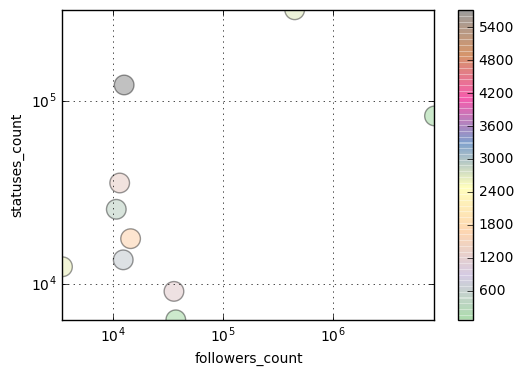

In [44]:
x = users_unique["followers_count"]
y = users_unique["statuses_count"]
z = users_unique["friends_count"]
plt.scatter(x, y, c=z, alpha=0.4, s=200, cmap=plt.cm.Accent)
plt.yscale("symlog")
plt.xscale("symlog")
plt.ylim(y.min(),y.max())
plt.xlim(x.min(),x.max())
plt.grid()
plt.xlabel("followers_count")
plt.ylabel("statuses_count")
plt.colorbar()
plt.show()

#Resources:
#https://www.youtube.com/watch?v=2b32-KVzBXQ
#http://pythondata.com/collecting-storing-tweets-with-python-and-mongodb/

    